# Desafío Empresarial: Análisis Analítico para IronHack Media (Proyecto 2)

Explora el conjunto de datos que contiene indicadores clave de rendimiento empresarial (KPI: *Key Performance Indicator*) de los primeros años de una startup adquirida por IronHack.

Por favor, completa las siguientes tareas:

## Análisis Descriptivo Completo

Realiza un análisis descriptivo integral enfocándote en los siguientes aspectos:

### Análisis por Cliente

- Explora y analiza los datos para entender el desempeño de la startup con respecto a clientes individuales.
- Identifica tendencias, patrones y anomalías en los KPIs específicos de los clientes.
- Visualiza las principales conclusiones relacionadas con el rendimiento del cliente.

### Análisis por País

- Lleva a cabo un análisis del desempeño del negocio de la startup en diferentes países.
- Compara y contrasta los KPIs a través de varios países.
- Crea visualizaciones para presentar los hallazgos específicos de cada país.

### Análisis por Línea de Negocio

- Evalúa el desempeño de las diferentes líneas de negocio de la startup.
- Determina cuáles líneas de negocio son más rentables y cuáles podrían necesitar mejoras.
- Utiliza visualizaciones para ilustrar los resultados del análisis.

### Análisis Adicional Relevante

- Realiza cualquier análisis adicional que creas relevante para obtener una comprensión más profunda de los datos del negocio de la startup.
- Explora correlaciones, tendencias a lo largo del tiempo o cualquier otro aspecto que pueda proporcionar percepciones valiosas.

## Recomendaciones Estratégicas

Basado en tu análisis de datos, proporciona al menos tres recomendaciones estratégicas para IronHack Media. Estas recomendaciones deben derivarse de tus percepciones basadas en datos y apuntar a mejorar el rendimiento del negocio, la eficiencia o la rentabilidad. Todo deberá ser realizado con PowerBi.

Evaluaremos no solo tu capacidad para realizar un análisis exhaustivo, sino también tu habilidad para presentar y comunicar los hallazgos. ¡Buena suerte!


## Annotations

KPI (Key Performance Indicator) is a measurable value that indicates how effectively an individual, team, or organization is achieving a business objective. KPIs are used to evaluate success in reaching targets and can vary based on the type of business, industry, or specific goals.

The KPI included in the dataset can be:

* Revenues: how much money the company is making
* Costs: how much money the company is spending
* Points of sale: number of locations where the company is selling its products/services
* Connected points: number of connected locations

## Project start

Let's start our analysis

### Imports

In [48]:
# Let's start with the imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Loading data

In this section, we'll load the dataset and start some first overview

In [8]:
# Let's load the data and get some initial view
startup = pd.read_csv("IronHack_Media_dataset.csv", sep=';')

In [9]:
startup.describe()

,Revenues,Costs,Points of sale,Connected points
count,8.297000e+03,8.297000e+03,8297.000000,8297.000000
mean,3.131280e+07,3.033588e+07,5.521755,17.626250
std,1.166837e+09,1.143289e+09,2.878995,7.488097
min,4.000000e+00,2.000000e+00,1.000000,1.000000
25%,4.000000e+00,3.000000e+00,3.000000,11.000000
50%,4.000000e+00,4.000000e+00,6.000000,18.000000
75%,3.316800e+04,3.051400e+04,8.000000,24.000000
max,5.302370e+10,5.196323e+10,10.000000,30.000000


In [10]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8297 entries, 0 to 8296
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                8297 non-null   object
 1   Business line     8297 non-null   object
 2   Ad channel        2993 non-null   object
 3   Revenues          8297 non-null   int64 
 4   Costs             8297 non-null   int64 
 5   Country           8297 non-null   object
 6   Currency          8297 non-null   object
 7   Date              8297 non-null   object
 8   Client            8297 non-null   object
 9   Points of sale    8297 non-null   int64 
 10  Connected points  8297 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 713.2+ KB


In [11]:
startup.sample(10)

,ID,Business line,Ad channel,Revenues,Costs,Country,Currency,Date,Client,Points of sale,Connected points
1633,155/18,CONTENT,NaN,4,2,CO,Peso CO,09/12/2012,CA S.A.,1,6
160,019/18,CONTENT,NaN,4,2,ES,EUR,17/10/2012,DI S.A.,3,13
1191,111/18,CONTENT,NaN,5999,3000,ES,EUR,23/11/2012,CO S.A.,7,16
2645,256/18,MAINTENANCE,NaN,67218,60496,ES,EUR,23/01/2013,CO S.A.,10,21
7882,863/18,INSTALLATION,NaN,4,4,MX,Peso MX,26/09/2013,EN S.L.,10,24
5693,595/18,CONTENT,NaN,5999,3000,ES,EUR,14/06/2013,CO S.A.,10,16
3425,337/18,MAINTENANCE,NaN,9516,8564,ES,EUR,25/02/2013,DI S.A.,5,29
4621,464/18,CONTENT,NaN,4,2,ES,EUR,02/04/2012,PR S.L.,4,10
4406,439/18,CONTENT,NaN,4,2,ES,EUR,28/03/2013,DI S.A.,2,28
366,040/18,CONTENT,NaN,5999,3000,ES,EUR,25/10/2012,CO S.A.,1,21


In [14]:
startup.columns

Index(['ID ', 'Business line', 'Ad channel', 'Revenues', 'Costs', 'Country',
       'Currency', 'Date', 'Client', 'Points of sale', 'Connected points'],
      dtype='object')

In [20]:
# let's get rid of the inconvenient white-space of column 'ID'
startup.rename(columns={'ID ': 'ID'}, inplace=True)
startup.columns

Index(['ID', 'Business line', 'Ad channel', 'Revenues', 'Costs', 'Country',
       'Currency', 'Date', 'Client', 'Points of sale', 'Connected points'],
      dtype='object')

In [21]:
# Let's check whether ID corresponds to a customer id
# The idea is that if there are more than one row with the same ID, that could meant that the row corresponds to a concrete transaction.
startup.groupby('ID').head()

,ID,Business line,Ad channel,Revenues,Costs,Country,Currency,Date,Client,Points of sale,Connected points
0,001/18,HARDWARE,NaN,116141,113818,ES,EUR,03/10/2012,CO S.A.,8,23
1,001/18,INSTALLATION,NaN,8874,8164,ES,EUR,03/10/2012,CO S.A.,3,27
2,001/18,MAINTENANCE,NaN,67218,60496,ES,EUR,03/10/2012,CO S.A.,5,15
3,001/18,SOFTWARE,NaN,16306,8153,ES,EUR,03/10/2012,CO S.A.,1,7
4,001/18,CONTENT,NaN,5999,3000,ES,EUR,03/10/2012,CO S.A.,10,14
...,...,...,...,...,...,...,...,...,...,...,...
8289,959/17,HARDWARE,NaN,4,4,MX,Peso MX,31/07/2012,Gm S. A,4,21
8290,959/17,INSTALLATION,NaN,4,4,MX,Peso MX,31/07/2012,Gm S. A,3,20
8291,959/17,MAINTENANCE,NaN,4,4,MX,Peso MX,31/07/2012,Gm S. A,2,19
8292,959/17,SOFTWARE,NaN,4,2,MX,Peso MX,31/07/2012,Gm S. A,8,25


In [23]:
# Let's check if ID '001/18' has repeated values for 'Business line'
startup[startup['ID'] == '001/18'][['Business line', 'Points of sale']]

,Business line,Points of sale
0,HARDWARE,8
1,INSTALLATION,3
2,MAINTENANCE,5
3,SOFTWARE,1
4,CONTENT,10
5,ADVERTISING,4
6,ADVERTISING,3
7,ADVERTISING,9


In [33]:
# Let's check the number of different customers
len(startup['ID'].unique())

1387

### First conclusions

Up to this point, it seems that the dataset has 11 columns and no null values except for 'Ad channel'

There are four potential KPIs, namely: Revenues, Costs, Points of sale and Connected points.

Every row corresponds to a sort of transaction by a customer, identified by 'ID' and named as 'Client'.  At least, this will be the approach we'll get on this analysis from now on.

There are more than 1000 customers so an aggregated approach is required to analyze them.


## Customer Analysis

### First attempt

In [86]:
# Let's get some figures
customers_kpi = startup.groupby('Client').agg({'Revenues': 'sum', 'Costs': 'sum'})
customers_kpi.describe()

,Revenues,Costs
count,2.350000e+02,2.350000e+02
mean,1.105542e+09,1.071050e+09
std,1.519576e+10,1.487201e+10
min,9.860000e+02,6.410000e+02
25%,4.776650e+04,3.325150e+04
50%,1.814800e+05,1.519500e+05
75%,8.601280e+05,6.250370e+05
max,2.324020e+11,2.275382e+11


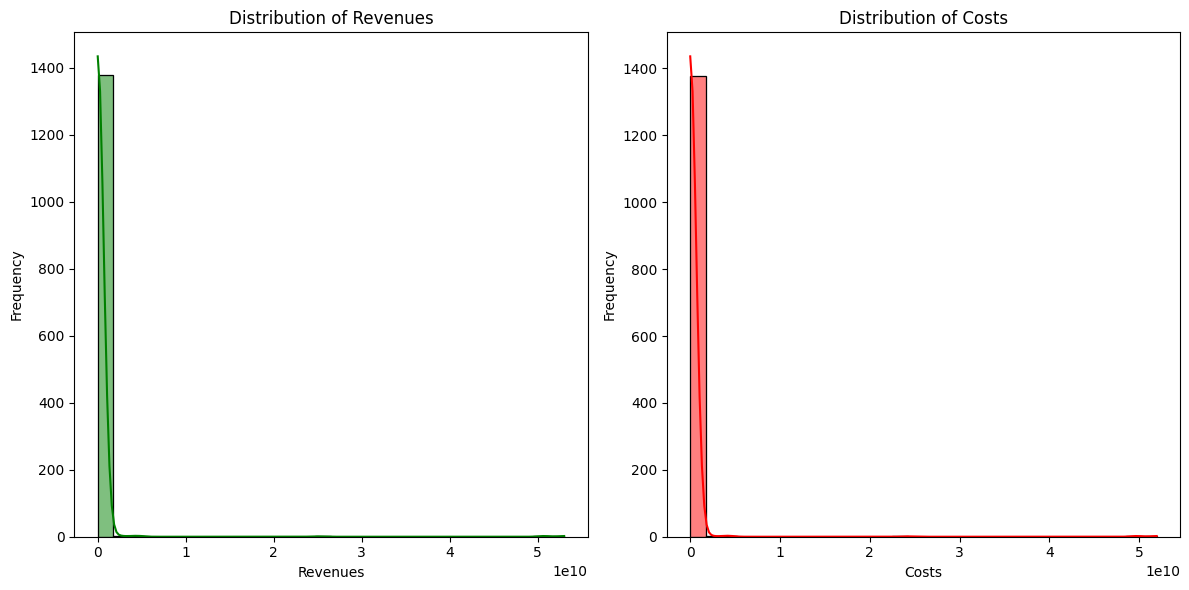

In [77]:
# Let's get some visualizations from the exploratory data analysis (EDA)
plt.figure(figsize=(12, 6))

# Revenues
plt.subplot(1, 2, 1)
sns.histplot(customers_kpi['Revenues'], kde=True, bins=30, color='green')
plt.title('Distribution of Revenues')
plt.xlabel('Revenues')
plt.ylabel('Frequency')

# Costs
plt.subplot(1, 2, 2)
sns.histplot(customers_kpi['Costs'], kde=True, bins=30, color='red')
plt.title('Distribution of Costs')
plt.xlabel('Costs')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


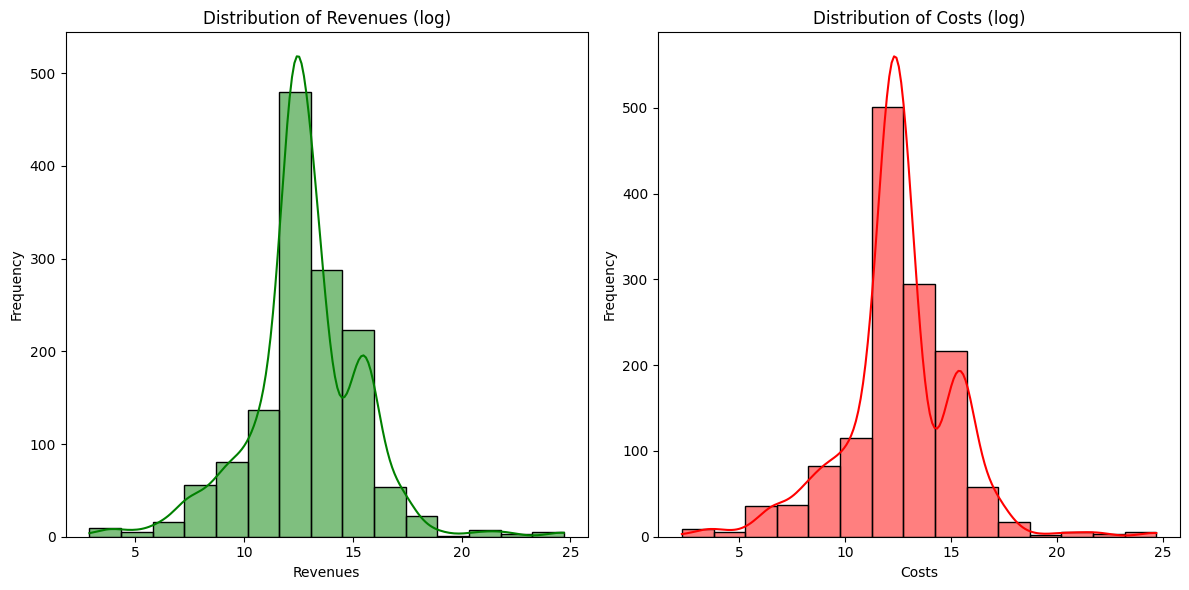

In [60]:
# The histograms show an extremely skewed data, So let's remove some outliers from the equation
# Since the numbers are so big, let's try to apply a log transformation
customers_kpi['Log_Revenues'] = np.log1p(customers_kpi['Revenues'])
customers_kpi['Log_Costs'] = np.log1p(customers_kpi['Costs'])

# Let's get the histograms for the log KPIs
plt.figure(figsize=(12, 6))

# Revenues
plt.subplot(1, 2, 1)
sns.histplot(customers_kpi['Log_Revenues'], kde=True, bins=15, color='green')
plt.title('Distribution of Revenues (log)')
plt.xlabel('Revenues')
plt.ylabel('Frequency')

# Costs
plt.subplot(1, 2, 2)
sns.histplot(customers_kpi['Log_Costs'], kde=True, bins=15, color='red')
plt.title('Distribution of Costs (log)')
plt.xlabel('Costs')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [50]:
# Let's get some numbers
customers_kpi[['Log_Revenues', 'Log_Costs']].describe()

,Log_Revenues,Log_Costs
count,1387.000000,1387.000000
mean,12.773391,12.499805
std,2.581703,2.644693
min,2.890372,2.302585
25%,11.898598,11.653444
50%,12.447225,12.173761
75%,13.910742,13.403013
max,24.694005,24.673802


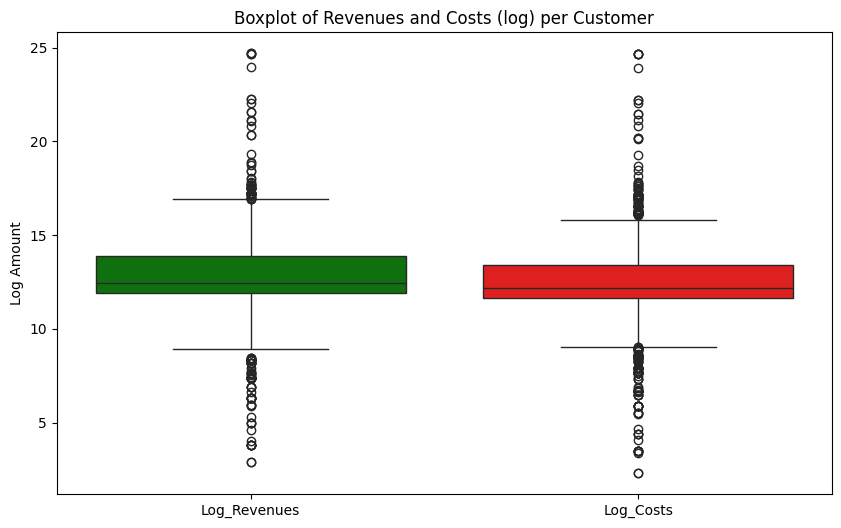

In [53]:
# What about some boxplotting?
plt.figure(figsize=(10, 6))
sns.boxplot(data=customers_kpi[['Log_Revenues', 'Log_Costs']], palette=['green', 'red'])
plt.title('Boxplot of Revenues and Costs (log) per Customer')
plt.ylabel('Log Amount')
plt.show()

#### Interpretation

Displaying the original values resulted in charts that were difficult to interpret due to the wide range of amounts. To address this, a logarithmic transformation was applied, compressing the range of values and making patterns more visible. The resulting charts reveal a right-skewed distribution, with most values concentrated at lower amounts and some high-value outliers.

During this analysis, I identified a critical issue: the revenue and cost amounts do not account for differences in currency. Therefore, the next steps should include normalizing these values to a common currency to ensure accurate comparisons.

### Second attempt

In this attempt, I'll try the following:

Narrowing the customer analysis by answering the following three questions:

1. How do profits distribute over time?
2. Who are the best and worst customers?
3. Do ads increase profits?

To do so, I'll fix the problem of different currencies by converting them into euro.
I'll also simplify the KPIs by getting the new column 'Profit' from 'Revenue' and 'Cost'

Let's go!

In [66]:
# Compute profit column
startup['Raw Profits'] = startup['Revenues'] - startup['Costs']
startup.sample(10)

,ID,Business line,Ad channel,Revenues,Costs,Country,Currency,Date,Client,Points of sale,Connected points,Profits,Raw Profits
980,101/18,INSTALLATION,NaN,8874,8164,ES,EUR,19/11/2012,CO S.A.,3,6,710,710
2881,281/18,CONTENT,NaN,5999,3000,ES,EUR,30/01/2013,DI S.A.,10,20,2999,2999
4319,429/18,ADVERTISING,Canal Rojo,4,3,MX,Peso MX,26/03/2013,Gm S. A,10,15,1,1
7670,836/18,ADVERTISING,Canal Azul,4,3,ES,EUR,04/09/2013,DI S.A.,6,10,1,1
8082,887/18,INSTALLATION,NaN,77775,71553,ES,EUR,27/09/2013,HO S.L.,6,12,6222,6222
2964,289/18,ADVERTISING,Canal Rojo,4,3,ES,EUR,03/02/2013,CO S.A.,9,14,1,1
2146,208/18,HARDWARE,NaN,2979493,2919903,CO,Peso CO,02/01/2013,CA S.A.,6,14,59590,59590
3133,306/19,CONTENT,NaN,298509,149255,ES,EUR,30/06/2014,RE.L.U.,8,24,149254,149254
4322,430/18,INSTALLATION,NaN,4,4,MX,Peso MX,26/03/2013,Ve.A.U.,2,3,0,0
2835,276/18,SOFTWARE,NaN,285837,142919,CO,Peso CO,27/01/2013,CA S.A.,6,9,142918,142918


In [62]:
# Check wich currencies are in play
startup['Currency'].unique()

array(['EUR', 'Peso CO', 'Peso MX'], dtype=object)

In [76]:

# Since there are just three currencies, the easiest way of converting them into Euro is by using a regular python dict
conversion_rates = {     # rates on Nov. 6 2024
    'EUR': 1,
    'Peso CO': 0.000211,
    'Peso MX': 0.05,
}

startup['Profits'] = startup.apply(lambda row: row['Raw Profits'] * conversion_rates[row['Currency']], axis=1)
startup.sample(10)

,ID,Business line,Ad channel,Revenues,Costs,Country,Currency,Date,Client,Points of sale,Connected points,Profits,Raw Profits
4687,472/18,ADVERTISING,Canal Verde,4,3,ES,EUR,03/04/2013,CO S.A.,8,12,1.000000,1
3565,351/18,ADVERTISING,Canal Rojo,4,3,ES,EUR,28/02/2013,CO S.A.,1,2,1.000000,1
2013,194/19,INSTALLATION,NaN,1153218,1060961,ES,EUR,05/03/2014,MA TEAM,3,23,92257.000000,92257
1286,121/18,ADVERTISING,Canal Verde,4,3,CO,Peso CO,28/11/2012,CA S.A.,4,10,0.000211,1
5364,556/18,SOFTWARE,NaN,285837,142919,ES,EUR,09/05/2013,DI S.A.,4,8,142918.000000,142918
7926,868/18,ADVERTISING,Canal Azul,4,3,IT,EUR,27/09/2013,FO S.L.,5,20,1.000000,1
5445,564/18,CONTENT,NaN,4,2,ES,EUR,27/05/2013,DI S.A.,7,30,2.000000,2
284,032/18,INSTALLATION,NaN,8874,8164,ES,EUR,22/10/2012,CO S.A.,6,26,710.000000,710
3018,295/18,SOFTWARE,NaN,16306,8153,ES,EUR,07/02/2013,CO S.A.,3,13,8153.000000,8153
6344,673/18,ADVERTISING,Canal Rojo,4,3,ES,EUR,10/07/2013,DI S.A.,2,7,1.000000,1


In [100]:
# Again with the grouping by customer
customer_profits = startup.groupby('Client').agg({'Profits': 'sum'}).sort_values(['Profits'], ascending=False).reset_index()

In [101]:
customer_profits.head(20)

,Client,Profits
0,ECNOCOM,4.863777e+09
1,DI S.A.,1.740762e+09
2,FO S.L.,1.338512e+08
3,Viroski,1.177566e+08
4,RE.L.U.,7.948205e+07
5,ROS.L.,5.185085e+07
6,CO S.A.,4.930075e+07
7,BA S.A.,3.182847e+07
8,BP.A.U.,2.945751e+07
9,CLVARRA,2.899225e+07


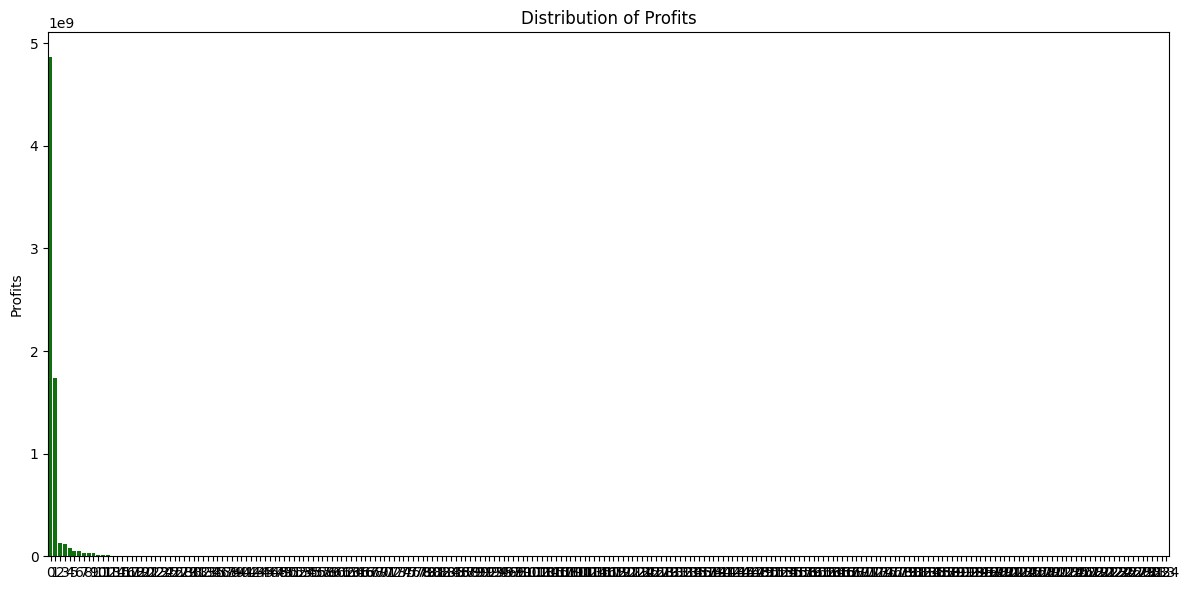

In [102]:
# Let's get some visualizations from the exploratory data analysis (EDA)
plt.figure(figsize=(12, 6))

sns.barplot(customer_profits['Profits'], color='green')
plt.title('Distribution of Profits')

plt.tight_layout()
plt.show()

In [117]:
# First and last 10 customers by profit
top_10_clients = customer_profits.nlargest(10, 'Profits').sort_values(['Profits'], ascending=True).reset_index()
bottom_10_clients = customer_profits.nsmallest(10, 'Profits').sort_values(['Profits'], ascending=True).reset_index()

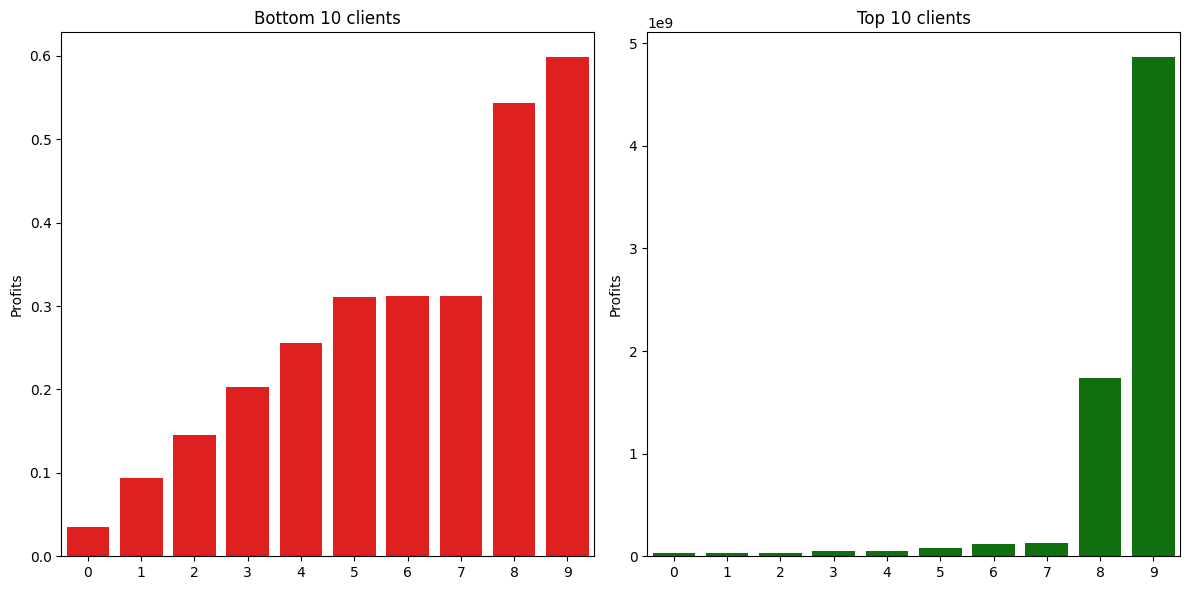

In [118]:
# Let's get a chart
plt.figure(figsize=(12, 6))

# Bottom
plt.subplot(1, 2, 1)
sns.barplot(bottom_10_clients['Profits'],color='red')
plt.title('Bottom 10 clients')

# Top
plt.subplot(1, 2, 2)
sns.barplot(top_10_clients['Profits'], color='green')
plt.title('Top 10 clients')

plt.tight_layout()
plt.show()

In [84]:
# Still we get an informative chart so let's go for the logaritmic transformation

customers_profits['Log_Profits'] = np.log1p(customers_profits['Profits'])

# Let's get the histograms for the log KPIs
plt.figure(figsize=(12, 6))

# Profits
sns.histplot(customers_kpi['Log_Profits'], kde=True, bins=15, color='green')
plt.title('Distribution of Profits (log)')
plt.xlabel('Profits')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

KeyError: 'Log_Profits'

<Figure size 1200x600 with 0 Axes>